# Classificador - Naive Bayes

In [1]:
# Importanto libs

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 

import warnings
warnings.filterwarnings('ignore')

In [2]:
base = pd.read_csv('./data/Credit.csv')
base.head().T

,0,1,2,3,4
checking_status,<0,0<=X<200,'no checking',<0,<0
duration,6,48,12,42,24
credit_history,'critical/other existing credit','existing paid','critical/other existing credit','existing paid','delayed previously'
purpose,radio/tv,radio/tv,education,furniture/equipment,'new car'
credit_amount,1169,5951,2096,7882,4870
savings_status,'no known savings',<100,<100,<100,<100
employment,>=7,1<=X<4,4<=X<7,4<=X<7,1<=X<4
installment_commitment,4,2,2,2,3
personal_status,'male single','female div/dep/mar','male single','male single','male single'
other_parties,none,none,none,guarantor,none


In [3]:
# Classe - Vira uma matriz
classe = base.iloc[:, 20].values

# Previsores - 
previsores = base.iloc[:, 0:20].values

In [4]:
classe.shape

(1000,)

In [5]:
previsores.shape

(1000, 20)

In [6]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

In [7]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [8]:
classe

array(['good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'go

In [9]:
# Separando os dados de treinamento e de teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size= 0.3, random_state=0 )

In [10]:
# Criando e treinando o modelo
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [11]:
# Previsões usando o teste
prev = naive_bayes.predict(X_teste)

In [12]:
confu = confusion_matrix(y_teste, prev)
confu

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [13]:
taxa_acerto = accuracy_score(y_teste, prev)
taxa_erro = 1-taxa_acerto
print(taxa_acerto)
print(taxa_erro)

0.71
0.29000000000000004


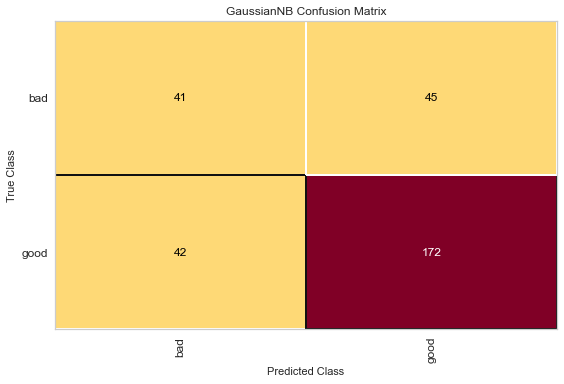

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [15]:
n_credit = pd.read_csv('./data/NovoCredit.csv')
n_credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [16]:
n_credit = n_credit.iloc[:,0:20].values
n_credit[:,0] = labelencoder1.transform(n_credit[:,0])
n_credit[:, 2] = labelencoder2.transform(n_credit[:, 2])
n_credit[:, 3] = labelencoder3.transform(n_credit[:, 3])
n_credit[:, 5] = labelencoder4.transform(n_credit[:, 5])
n_credit[:, 6] = labelencoder5.transform(n_credit[:, 6])
n_credit[:, 8] = labelencoder6.transform(n_credit[:, 8])
n_credit[:, 9] = labelencoder7.transform(n_credit[:, 9])
n_credit[:, 11] = labelencoder8.transform(n_credit[:, 11])
n_credit[:, 13] = labelencoder9.transform(n_credit[:, 13])
n_credit[:, 14] = labelencoder10.transform(n_credit[:, 14])
n_credit[:, 16] = labelencoder11.transform(n_credit[:, 16])
n_credit[:, 18] = labelencoder12.transform(n_credit[:, 18])
n_credit[:, 19] = labelencoder13.transform(n_credit[:, 19])

In [17]:
naive_bayes.predict(n_credit)

array(['good'], dtype='<U4')